# 1.0 Notebook Configuration

Please specify the following variables:
1. `project_directory`: your project directory path
2. `epsilon_list`: the list of execution error multiplers (epsilon) that you want to consider in your analysis.
3. `player_id`: the index of the player that you want to use for the base skill model. 
    - Initial paper analysis used `player_id=10` (Smith)
    - Average professional player model usese `player_id='AVG'`
    - Additional player index options can be found in Section 4.4. of `analysis/0_analysis_skill/0_1_eda_skill_models.ipynb`

In [1]:
# 1. Change this to the project directory path for your computer  
# project_directory = '/Users/rachael/Desktop/darts-thesis'
project_directory = '/Users/Craig/PycharmProjects/darts-thesis'

# 2. Set the epsilons that will be considered in this analysis 
#epsilon_list = [1,2,3,4,5,6,7,8,9]
epsilon_list = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,32,64,128]

# 3. Set the ID of the player skill models you want to use 
# player_id = 10
player_id = "AVG"


# 4. Set the number of pixels per mm you want to use when integrating the Gaussians to get transition probabilities
pixel_per_mm = 0.5

# 2.0 Notebook Setup

In [2]:
# Import and configure modules from this project

import os

os.chdir(project_directory)

import function_helpers_augmented_skill_level as ha # Want to import this before we reset our directory 

import function_init_simple_mdp as imdp
import function_init_board as fb

data_parameter_dir = fb.data_parameter_dir

playerID_list = [player_id]


In [3]:
# Import external libraries 

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# 3.0 Generate Augmented Transition Probability Data

Use augmented integrator to differentiate between inner and outer singles in transition probabilities. 

In [4]:
# Integrate transition probabilities - this will take >= 5 mins to run per epsilon (for default setting of 0.5 pixels per mm)

for epsilon in epsilon_list:
    ha.evaluate_score_probability(playerID_list,epsilon=epsilon,f_density_grid_pixel_per_mm=pixel_per_mm)

C:\Users\Craig\PycharmProjects\darts-thesis
f_density_grid_num=171 f_density_grid_width=2.0

computing ./data_parameter/player_gaussin_fit/grid_full_augmented/e1_playerAVG_gaussin_prob_grid.pkl
computation is done in 153.11208629608154 seconds
dump_pickle to ./data_parameter/player_gaussin_fit/grid_full_augmented/e1_playerAVG_gaussin_prob_grid.pkl
C:\Users\Craig\PycharmProjects\darts-thesis
f_density_grid_num=171 f_density_grid_width=2.0

computing ./data_parameter/player_gaussin_fit/grid_full_augmented/e2_playerAVG_gaussin_prob_grid.pkl
computation is done in 144.2041618824005 seconds
dump_pickle to ./data_parameter/player_gaussin_fit/grid_full_augmented/e2_playerAVG_gaussin_prob_grid.pkl
C:\Users\Craig\PycharmProjects\darts-thesis
f_density_grid_num=171 f_density_grid_width=2.0

computing ./data_parameter/player_gaussin_fit/grid_full_augmented/e3_playerAVG_gaussin_prob_grid.pkl
computation is done in 145.26406955718994 seconds
dump_pickle to ./data_parameter/player_gaussin_fit/grid_f

In [5]:
for epsilon in epsilon_list: 
    ha.save_aiming_grid(playerID_list,epsilon=epsilon)

generate and save action set grid_version=custom_augmented
load_pickle from ./data_parameter/player_gaussin_fit/grid_full_augmented/e1_playerAVG_gaussin_prob_grid.pkl
dump_pickle to ./data_parameter/player_gaussin_fit/grid_custom_augmented/playerAVG_e1_gaussin_prob_grid_custom_augmented.pkl

generate and save action set grid_version=custom_augmented
load_pickle from ./data_parameter/player_gaussin_fit/grid_full_augmented/e2_playerAVG_gaussin_prob_grid.pkl
dump_pickle to ./data_parameter/player_gaussin_fit/grid_custom_augmented/playerAVG_e2_gaussin_prob_grid_custom_augmented.pkl

generate and save action set grid_version=custom_augmented
load_pickle from ./data_parameter/player_gaussin_fit/grid_full_augmented/e3_playerAVG_gaussin_prob_grid.pkl
dump_pickle to ./data_parameter/player_gaussin_fit/grid_custom_augmented/playerAVG_e3_gaussin_prob_grid_custom_augmented.pkl

generate and save action set grid_version=custom_augmented
load_pickle from ./data_parameter/player_gaussin_fit/grid_full

# 4.0 Load Data

In [6]:
# Load dataset 

name_pa = 'player{}'.format(player_id)
data_parameter_dir = fb.data_parameter_dir

bullseye_probs = []
s_inner_probs = []
s_outer_probs = []
t_probs = []
d_probs = []

for epsilon in epsilon_list: 
    [aiming_grid, prob_grid_normalscore, prob_grid_singlescore, prob_grid_doublescore, prob_grid_triplescore, prob_grid_bullscore,prob_grid_singlescore_inner,prob_grid_singlescore_outer] = ha.load_aiming_grid(name_pa, epsilon=epsilon, data_parameter_dir=data_parameter_dir, grid_version='custom_augmented')
    bullseye_probs.append(prob_grid_bullscore[728].copy())
    s_inner_probs.append(prob_grid_singlescore_inner[728].copy())
    s_outer_probs.append(prob_grid_singlescore_outer[728].copy())
    t_probs.append(prob_grid_triplescore[728].copy())
    d_probs.append(prob_grid_doublescore[728].copy())


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/playerAVG_e1_gaussin_prob_grid_custom_augmented.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/playerAVG_e2_gaussin_prob_grid_custom_augmented.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/playerAVG_e3_gaussin_prob_grid_custom_augmented.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/playerAVG_e4_gaussin_prob_grid_custom_augmented.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/playerAVG_e5_gaussin_prob_grid_custom_augmented.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/playerAVG_e6_gaussin_prob_grid_custom_augmented.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/playerAVG_e7_gaussin_prob_grid_custom_augmented.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_augmented/playerAVG_e8_gaussin_prob_grid_custo

In [7]:
# Merge into dataset 

prob_list = []

for i in range(len(epsilon_list)):
    db_prob = bullseye_probs[i][1]
    sb_prob = bullseye_probs[i][0]
    s_inner_prob = sum(s_inner_probs[i][:])
    t_prob = sum(t_probs[i][:])
    s_outer_prob = sum(s_outer_probs[i][:])
    d_prob = sum(d_probs[i][:])
    miss = 1 - db_prob - sb_prob - s_inner_prob - t_prob - s_outer_prob - d_prob
    epsilon = epsilon_list[i]
    prob_list.append([epsilon,db_prob,sb_prob,s_inner_prob,t_prob,s_outer_prob,d_prob,miss])


# 6.0 Skill Estimation Tool 



In [8]:
df_skill = pd.DataFrame(prob_list,columns= ['epsilon','DB','SB','Inner Single','Triple','Outer Single','Double','Miss'])
df_skill = df_skill.round(4)
df_skill = df_skill.set_index('epsilon')
df_skill

,DB,SB,Inner Single,Triple,Outer Single,Double,Miss
epsilon,,,,,,,
1,0.2883,0.5405,0.1712,0.0000,0.0000,0.0000,-0.0000
2,0.1563,0.4307,0.4130,0.0000,0.0000,0.0000,-0.0000
3,0.1071,0.3385,0.5543,0.0000,0.0000,0.0000,-0.0000
4,0.0815,0.2762,0.6423,0.0000,0.0000,0.0000,-0.0000
5,0.0657,0.2326,0.7017,0.0000,0.0000,0.0000,-0.0000
6,0.0551,0.2006,0.7443,0.0000,0.0000,0.0000,0.0000
7,0.0474,0.1762,0.7763,0.0000,0.0000,0.0000,0.0000
8,0.0416,0.1571,0.8012,0.0001,0.0000,0.0000,0.0000
9,0.0371,0.1416,0.8208,0.0003,0.0001,0.0000,0.0000


In [9]:
(df_skill*30).round(2)

,DB,SB,Inner Single,Triple,Outer Single,Double,Miss
epsilon,,,,,,,
1,8.65,16.22,5.14,0.00,0.00,0.00,-0.00
2,4.69,12.92,12.39,0.00,0.00,0.00,-0.00
3,3.21,10.16,16.63,0.00,0.00,0.00,-0.00
4,2.45,8.29,19.27,0.00,0.00,0.00,-0.00
5,1.97,6.98,21.05,0.00,0.00,0.00,-0.00
6,1.65,6.02,22.33,0.00,0.00,0.00,0.00
7,1.42,5.29,23.29,0.00,0.00,0.00,0.00
8,1.25,4.71,24.04,0.00,0.00,0.00,0.00
9,1.11,4.25,24.62,0.01,0.00,0.00,0.00


# 7.0 Skill Estimation Efficacy 

We see there is a plateau effect for high epsilons where this test is less effective at differentiating between different epsilons. Would likely need a more sensitive test in practice where players aim for different locations on the board and you can combine the information. This version has imporved sensitivity compared to `0_2_eda_skill_estimation.ipynb` because it breaks out the "other" category into inner singles, triples, outer singles, doubles, board misses.

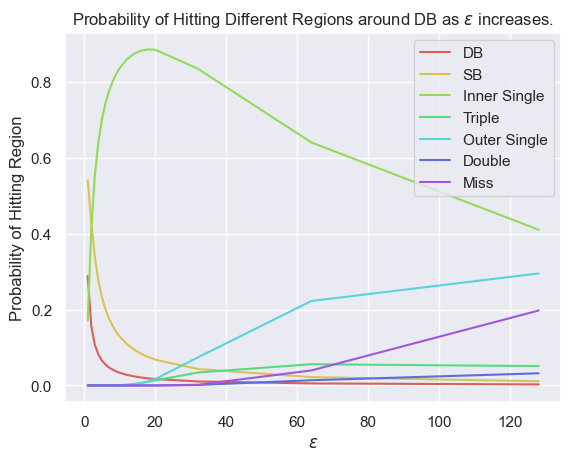

In [10]:
sns.set_theme()
sns.set_palette("hls", 8)
fig = df_skill.plot()
fig = plt.xlabel('$\epsilon$')
fig = plt.ylabel('Probability of Hitting Region')
fig = plt.title('Probability of Hitting Different Regions around DB as $\epsilon$ increases.')